In [ ]:
# Dataset : http://cb.lk/covid_19

!wget http://cb.lk/covid_19

In [ ]:
!unzip covid_19

In [3]:
TRAINING_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Val"


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import image

In [ ]:
import os
import cv2 
X_train = os.listdir(TRAINING_PATH+'/Covid')
for i in range(len(X_train)):
  X_train[i] = os.path.join(TRAINING_PATH+'/Covid',X_train[i])


In [111]:
normal = os.listdir(TRAINING_PATH+'/Normal')
for i in range(len(normal)):
  X_train.append(os.path.join(TRAINING_PATH+'/Normal',normal[i]))

In [119]:
train_dict = {}
for i in range(len(X_train)):
  train_dict["img"+str(i)] = plt.imread(X_train[i]) 

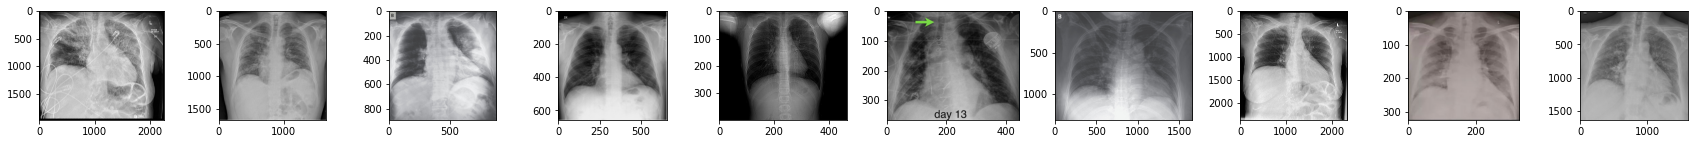

In [126]:
fig, ax = plt.subplots(1, 10, figsize=(30, 2))
for i in range(10):
    # ax[i].set(xlabel=train_dict[random_picks[i]])
    ax[i].imshow(train_dict['img'+str(i)])

In [39]:
# CNN Model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])



In [40]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 54, 54, 64)       

In [52]:
train_datagen = image.ImageDataGenerator(rescale=1/255.,
                                         shear_range=.2,
                                         zoom_range = .2,
                                         horizontal_flip = True)
test_datagen = image.ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory('CovidDataset/Train',
                                                    target_size = (224,224,),
                                                    batch_size=80,
                                                    class_mode='binary')
test_generator = test_datagen.flow_from_directory('CovidDataset/Val',
                                                    target_size = (224,224,),
                                                    batch_size=80,
                                                    class_mode='binary')

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [42]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [43]:
hist = model.fit_generator(
    train_generator,
    epochs=15,
    validation_data = test_generator
)

Epoch 1/15
3/3 [==============================] - 9s 3s/step - loss: 3.1520 - accuracy: 0.4821 - val_loss: 0.6848 - val_accuracy: 0.5000
Epoch 2/15
3/3 [==============================] - 7s 2s/step - loss: 0.7637 - accuracy: 0.5759 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 3/15
3/3 [==============================] - 7s 2s/step - loss: 0.6819 - accuracy: 0.5625 - val_loss: 0.6799 - val_accuracy: 0.5333
Epoch 4/15
3/3 [==============================] - 7s 2s/step - loss: 0.6072 - accuracy: 0.7321 - val_loss: 0.6213 - val_accuracy: 0.9167
Epoch 5/15
3/3 [==============================] - 7s 2s/step - loss: 0.5139 - accuracy: 0.7366 - val_loss: 0.4637 - val_accuracy: 0.9333
Epoch 6/15
3/3 [==============================] - 7s 2s/step - loss: 0.4477 - accuracy: 0.7857 - val_loss: 0.3939 - val_accuracy: 0.9000
Epoch 7/15
3/3 [==============================] - 7s 2s/step - loss: 0.3399 - accuracy: 0.8839 - val_loss: 0.3391 - val_accuracy: 0.9500
Epoch 8/15
3/3 [=========================

In [44]:
model.save('best_model.h5')

In [45]:
model.evaluate_generator(test_generator)

[0.11040422320365906, 0.9833333492279053]

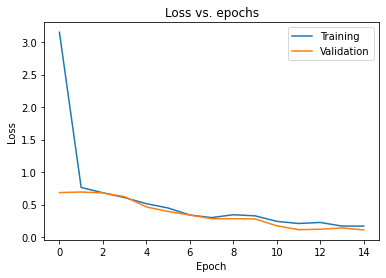

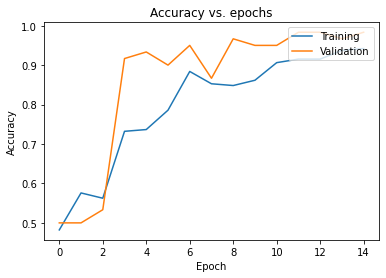

In [99]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()